<h1> 15 - Le format Netcdf: Visualisation avec la librairie Cartopy</h1>




<img src="./figures/cartopy.png" alt="Cartopy" width="50%" height="50%">



La bibliothèque <a href="https://scitools.org.uk/cartopy/docs/latest/#">Cartopy</a>  python vous permet d'analyser, de traiter et de tracer des données géoréférencées à l'aide de Matplotlib.


Pour installer la librairie sous anaconda: 
 conda install -c conda-forge cartopy


<h2> 15.1 - Tracer un champs Netcdf 2D </h2> 

- Nous allons travailler avec la climatologie mensuelle (1981-2010) de la température minimale journalière obtenue avec le produit ANUSPLIN_NLDAS_10km

La classe Dataset du module netCDF4 est utilisée pour ouvrir et lire des fichiers Netcdf.
Ici, nous allons stocker le fichier Netcdf dans la variable nc_fid.


In [1]:
from netCDF4 import Dataset
import warnings
warnings.filterwarnings("ignore")

filename='./DATA/ANUSPLIN/ANUSPLIN_NLDAS_10km_CLIMATO_TASMIN_1981_2010_06.nc'
nc_fid=Dataset(filename,'r')

Nons allons lire les variales TASMIN, lat et lon du fichier Netcdf: 

In [4]:
lats = nc_fid.variables['lat'][:]
lons = nc_fid.variables['lon'][:]
time = nc_fid.variables['time'][:]
Vals = nc_fid.variables['TASMIN'][:].squeeze()

Nous allons maintenant appeler les bibliothèques cartopy et matplotlib de Python pour créer une instance graphique. 

La bibliothèque carto.py est une bibliothèque maison qui apporte des fonctions pour enrichir visuellement les cartes réalisées avec cartopy: ajout d'une échelle ...

In [7]:
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib as mpl
from carto import scale_bar
import carto
help(carto)

Help on module carto:

NAME
    carto

FUNCTIONS
    find_side(ls, side)
        Given a shapely LineString which is assumed to be rectangular, return the
        line corresponding to a given side of the rectangle.
    
    lambert_xticks(ax, ticks)
        Draw ticks on the bottom x-axis of a Lambert Conformal projection.
    
    lambert_yticks(ax, ticks)
        Draw ricks on the left y-axis of a Lamber Conformal projection.
    
    scale_bar(ax, location, length, metres_per_unit=1000, unit_name='km', tol=0.01, angle=0, color='black', linewidth=3, text_offset=0.005, ha='center', va='bottom', plot_kwargs=None, text_kwargs=None, **kwargs)
        Add a scale bar to CartoPy axes.
        
        For angles between 0 and 90 the text and line may be plotted at
        slightly different angles for unknown reasons. To work around this,
        override the 'rotation' keyword argument with text_kwargs.
        
        Args:
            ax:              CartoPy axes.
            locatio

Nous créons une instance de Cartopy pour créer une carte. Nous choisissons ici notre projection, l'orientation de la grille et la couverture totale.

Voici un <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html">lien</a> très utile pour choisir un type de projection.


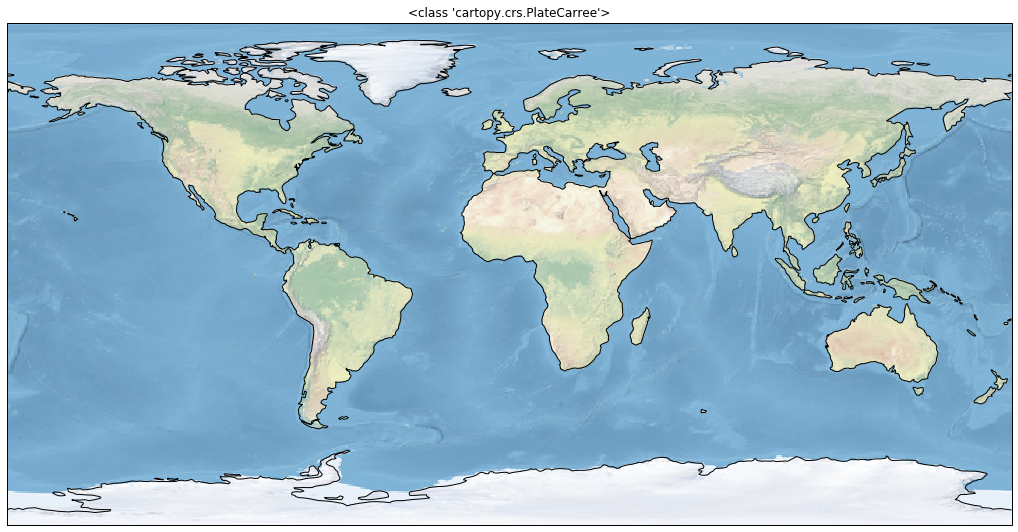

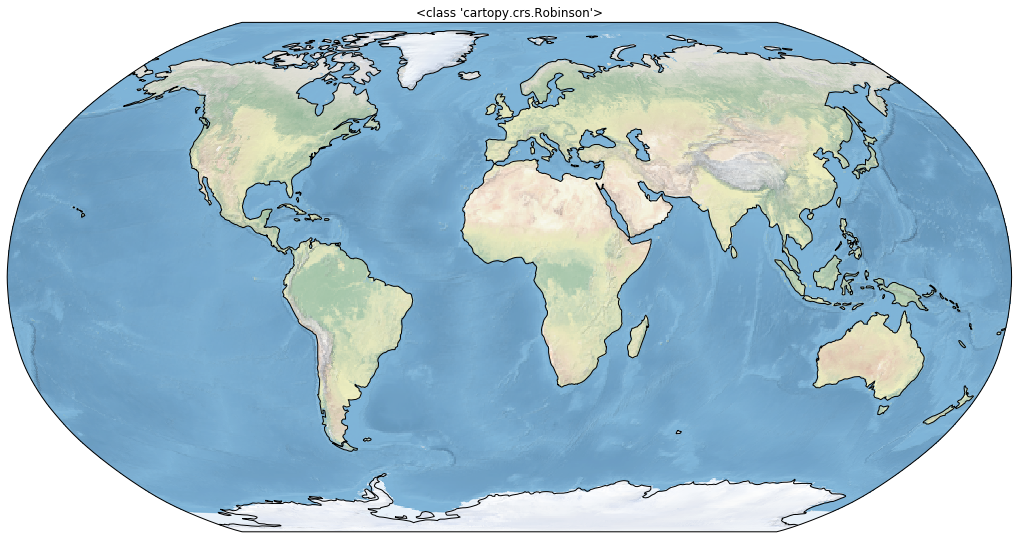

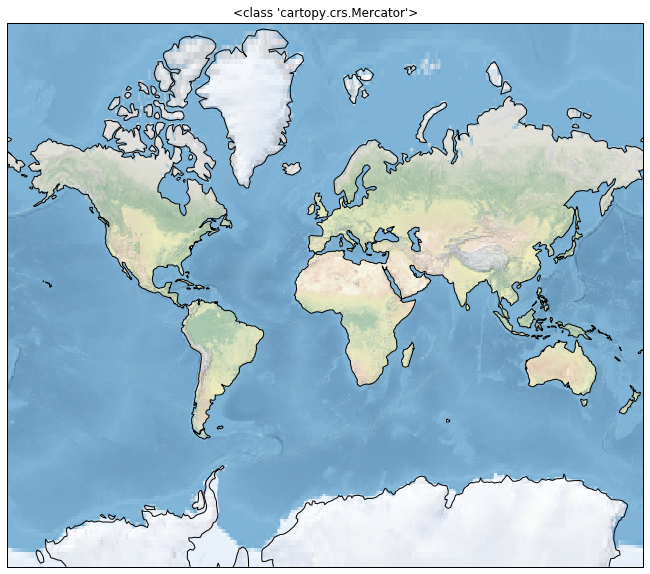

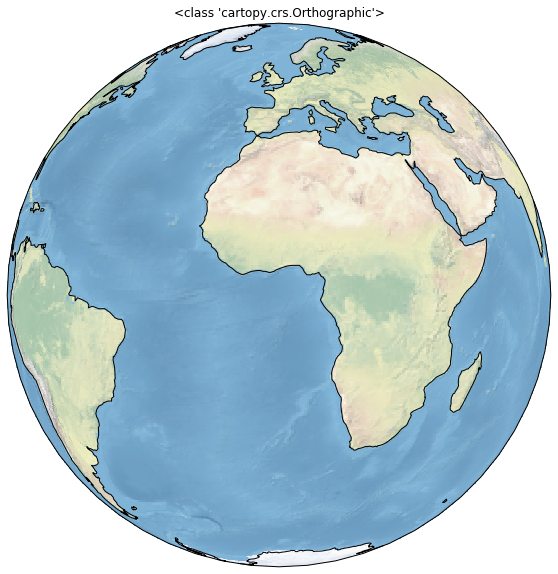

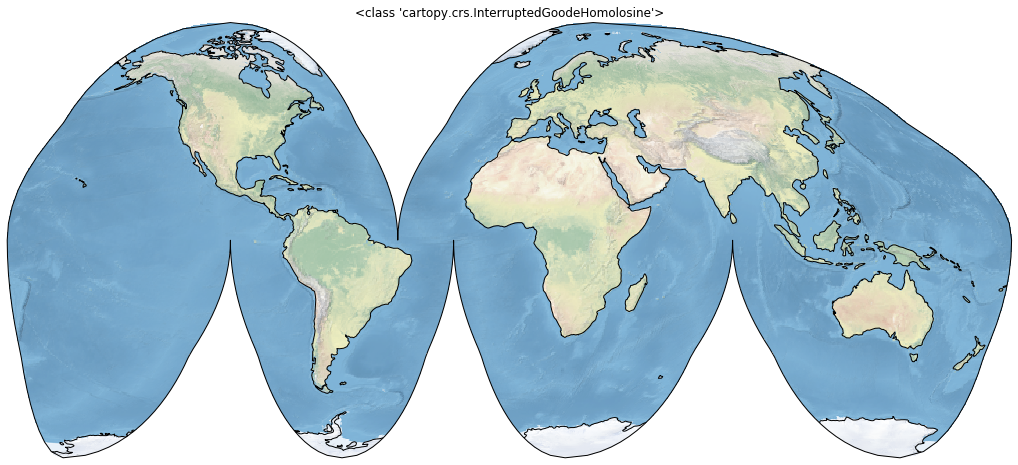

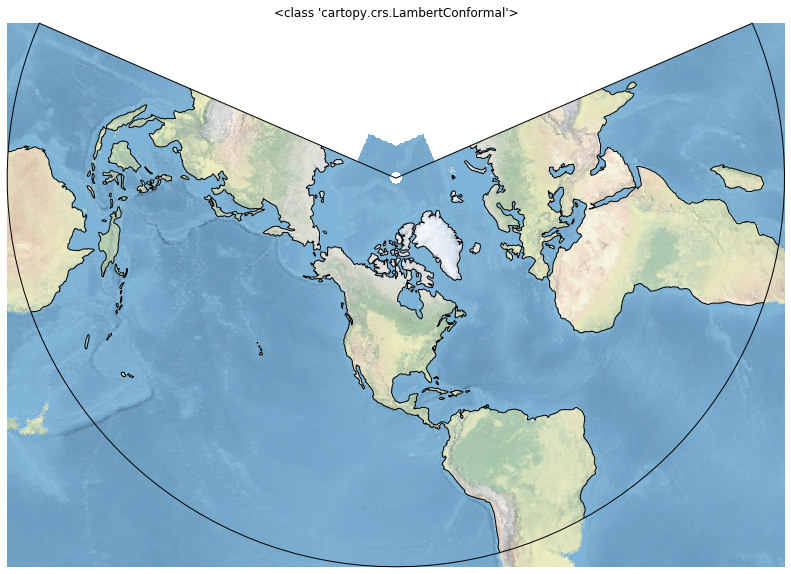

In [9]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine(),
               ccrs.LambertConformal(),
              ]

for proj in projections:
    plt.figure(figsize=(18, 10))
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

Dans notre exemple, nous travaillerons avec une projection dite "LambertConformal".

Pour créer une carte régionale, nous utilisons la méthode set_extent de GeoAxis pour limiter la taille de notre région.

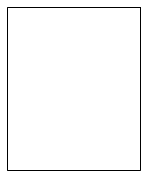

In [10]:
fig=plt.figure(figsize=(5,3), frameon=True)   
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-100,-60,18,62])

Nous ajouterons quelques produits à notre carte avec la méthode cartopy.feature de Cartopy:
https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html

<table border="1" class="docutils">
<colgroup>
<col width="27%">
<col width="57%">
</colgroup>
<tbody valign="top">

<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>BORDERS</b></span></tt></td>
<td>Borders</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>COASTLINE</b></span></tt></td>
<td>Coast </td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>LAKES</b></span></tt></td>
<td>Lakes</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>LAND</b></span></tt></td>
<td>Continents</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>OCEAN</b></span></tt></td>
<td>Ocean</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>RIVERS</b></span></tt></td>
<td>Rivers</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">cartopy.feature.<b>STATES</b></span></tt></td>
<td>States</td>
</tr>

</tbody>
</table>




Nous ajouterons également les provinces avec la classe NaturalEarthFeature de Cartopy:
https://scitools.org.uk/cartopy/docs/v0.16/matplotlib/feature_interface.html#cartopy.feature.NaturalEarthFeature


<b>-Ajout des côtes:</b>

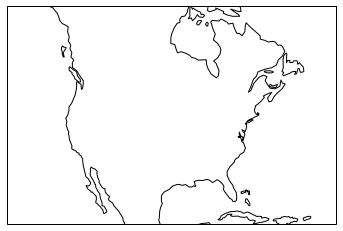

In [12]:
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
plt.show()


<b>-Ajout du continent et des océans:</b>

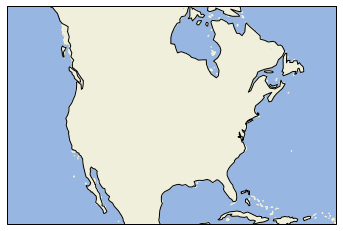

In [14]:
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
plt.show()

<b>-Ajout des lacs et des rivières:</b>

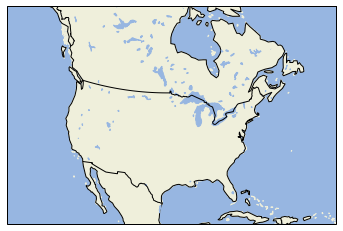

In [16]:
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
plt.show()

<b>-Ajout des états et des provinces:</b>

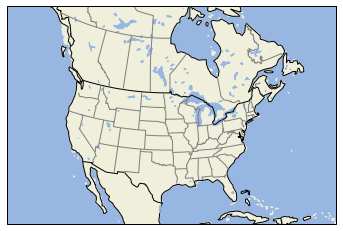

In [17]:
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])
ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
plt.show()

Nous pouvons maintenant remplir notre carte avec notre champ géoréférencé avec la méthode <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolormesh.html">pcolormesh</a> de matplotlib: 

Ici, les coordonnées de Lat Lon sont en 2D, donc à chaque point de la grille, nous connaissons la latitude et la longitude de nos champs.

Il est possible que pour un fichier netcdf Lat et Lon soient en 1D. Il faut ensuite les écrire en 2D avec la commande suivante:

-lon, lat = np.meshgrid (lons, lats)

Nous produirons également notre propre palette de couleurs. Voici un  <a href="http://colorbrewer2.org/#type=diverging&scheme=RdYlBu&n=8">lien</a> utile pour sélectionner nos couleurs et créer notre palette.

Vous pouvez également utiliser l'une des <a href="https://matplotlib.org/examples/color/colormaps_reference.html">palettes de couleurs prédéfinies</a> palettes de couleurs prédéfinies par Matplotlip.

Nous utiliserons pour dessiner notre type de carte pcolormesh matplotib. D'autres types de <a href="https://matplotlib.org/basemap/users/examples.html">tracés</a> sont disponibles.

Pour améliorer la lecture de notre carte, on peut à ce niveau ajouter:

- une légende sous la carte: cbar.set_label
- ajouter une barre de couleur avec un intervalle d'affichage: plt.colorbar

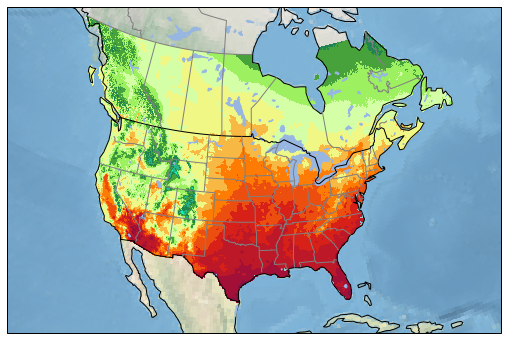

In [18]:
Y=np.array([[77,0,111],[115,14,181],[160,17,222],[195,14,240],\
               [0,0,93],[21,38,177],[33,95,227],[32,162,247],[59,224,248],[202,255,250],\
               [4,255,179],[37,181,139],[32,132,81],[72,162,60],[157,240,96],[213,255,166],\
               [241,247,132],[248,185,68],[255,124,4],[235,78,14],[215,32,24],[189,24,40],[162,16,56],[135,16,65],[107,15,73]])/255.

colbar=mpl.colors.ListedColormap(Y)
fig=plt.figure(figsize=(10,6), frameon=True)  
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])

mm = ax.pcolormesh(lons,\
                   lats,\
                   Vals,\
                   vmin=-28,\
                   vmax=28, \
                   transform=ccrs.PlateCarree(),\
                   cmap=colbar )


ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')  
ax.stock_img();
plt.show() 


Si la palette ne convient pas, il est possible d'utiliser une palette de Matplotlib.

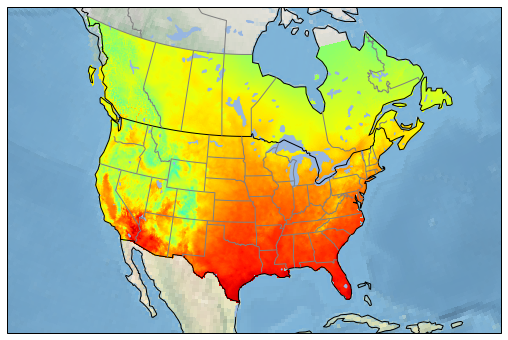

In [19]:
fig=plt.figure(figsize=(10,6), frameon=True)  
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])

mm = ax.pcolormesh(lons,\
                   lats,\
                   Vals,\
                   vmin=-28,\
                   vmax=28, \
                   transform=ccrs.PlateCarree(),\
                   cmap='jet' )


ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')  
ax.stock_img();
plt.show() 


On peut enfin ajouter:
    - un titre à notre graphique: plt.title
    - une barre de couleur: plt.colorbar
    - un titre à notre barre de couleur: plt.xlabel
    - latitudes et longitudes avec la fonction: gridlines()
    - une barre d'échelle: scale_bar ()
    
Enregistrez ensuite notre graphique avec la commande: plt.savefig

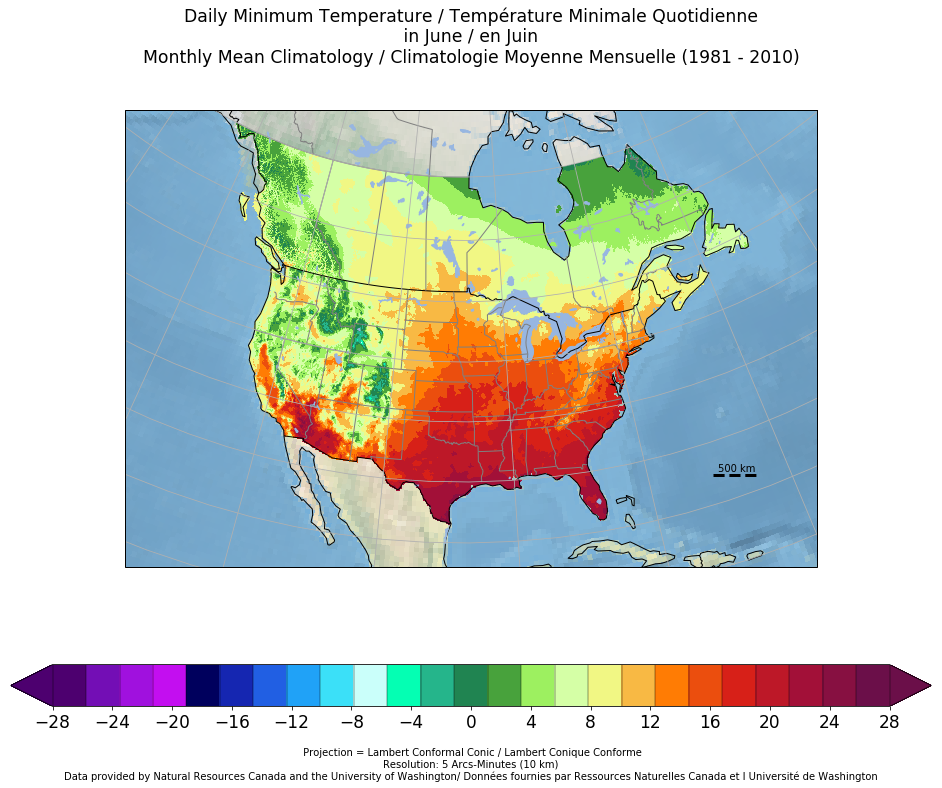

In [20]:
Y=np.array([[77,0,111],[115,14,181],[160,17,222],[195,14,240],\
               [0,0,93],[21,38,177],[33,95,227],[32,162,247],[59,224,248],[202,255,250],\
               [4,255,179],[37,181,139],[32,132,81],[72,162,60],[157,240,96],[213,255,166],\
               [241,247,132],[248,185,68],[255,124,4],[235,78,14],[215,32,24],[189,24,40],[162,16,56],[135,16,65],[107,15,73]])/255.

colbar=mpl.colors.ListedColormap(Y)
fig=plt.figure(figsize=(22,12), frameon=True)  
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,18,62])

mm = ax.pcolormesh(lons,\
                   lats,\
                   Vals,\
                   vmin=-28,\
                   vmax=28, \
                   transform=ccrs.PlateCarree(),\
                   cmap=colbar )


ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')  
ax.stock_img();

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = np.arange(-150.0,-40.0,20)
yticks =np.arange(10,80,10)
ax.gridlines()

# Standard 6,000 km scale bar.
scale_bar(ax, (0.85, 0.2), 500 ,plot_kwargs = dict(linestyle='dashed', color='black'))

cbar = plt.colorbar(mm, orientation='horizontal', shrink=0.75, drawedges='True', ticks=np.arange(-28, 28.1, 4),extend='both')
cbar.set_label(u'\n Projection = Lambert Conformal Conic / Lambert Conique Conforme\nResolution: 5 Arcs-Minutes (10 km)\nData provided by Natural Resources Canada and the University of Washington/ Données fournies par Ressources Naturelles Canada et l Université de Washington', size='medium') # Affichage de la légende de la barre de couleur
cbar.ax.tick_params(labelsize=17) 
 
plt.xlabel(u'\n\n\nTemperature / Température (°C)',size='x-large')
string_title=u'Daily Minimum Temperature / Température Minimale Quotidienne\n in June / en Juin \nMonthly Mean Climatology / Climatologie Moyenne Mensuelle (1981 - 2010)\n\n'
plt.title(string_title, size='xx-large')
plt.savefig('./figures/ANUSPLIN_NLDAS_10km_CLIM_TASMIN_06_1981-2010.png', bbox_inches='tight', pad_inches=0.1)
plt.show() 


<h2> 15.1 - Utiliser la fonction overplot de Matplotlib avec Cartopy </h2> 

Parfois, nous voulons avoir plusieurs cartes sur la même image.

- Nous travaillerons ici avec les climatologies de l'accumulation mensuelle totale des précipitations (1981-2010) pour tous les mois de l'année.



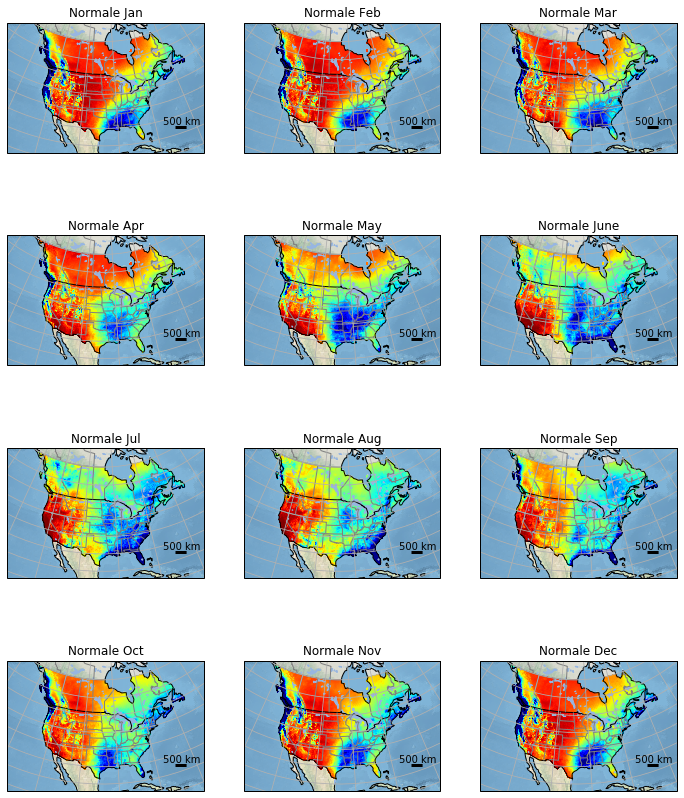

In [21]:
## we import librairies that we need

from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from carto import scale_bar

month_name=["Jan","Feb","Mar","Apr","May","June","Jul","Aug","Sep","Oct","Nov","Dec"]
rep_data='./DATA/ANUSPLIN/'

fig=plt.figure(figsize=(12,15))
clevs=np.arange(5,150.1,5)
## Colormap we will use
cmap0=plt.cm.jet_r
cmap0.set_under('w') 
cmap0.set_over('darkblue')

for imonth in np.arange(1,13):  # loop over 12 months
    ax=fig.add_subplot(4,3,imonth, projection=ccrs.LambertConformal())   
    fic=rep_data+'ANUSPLIN_NLDAS_10km_CLIMATO_PrecTOT_1981_2010_'+'{:02d}'.format(imonth)+'.nc'
    dset=Dataset(fic)
    precip=dset.variables['PrecTOT'][:].squeeze()
    lon=dset.variables['lon'][:].squeeze()
    lat=dset.variables['lat'][:].squeeze()
    
    ax.set_extent([-130,-60,18,62])
    ax.coastlines(resolution='110m');
    ax.add_feature(cfeature.LAND.with_scale('50m'))
    ax.add_feature(cfeature.OCEAN.with_scale('50m'))
    ax.add_feature(cfeature.LAKES.with_scale('50m'))
    ax.add_feature(cfeature.BORDERS.with_scale('50m'))

    mm = ax.pcolormesh(lon,\
                   lat,\
                   precip,\
                   vmin=0,\
                   vmax=150, \
                   transform=ccrs.PlateCarree(),\
                   cmap=cmap0 )
    plt.title('Normale '+ month_name[imonth-1],fontsize=12)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

    ax.add_feature(states_provinces, edgecolor='gray')  
    ax.stock_img();
    ax.gridlines();
    # Standard 6,000 km scale bar.
    scale_bar(ax, (0.85, 0.2), 500 ,plot_kwargs = dict(linestyle='dashed', color='black'))

plt.savefig('./figures/My_2Dlalon_multipanel_plot.png')
plt.show()

## 4 - Cartopy:  MODIS 

https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg

https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.txt

Text(-117, 33, 'San Diego')

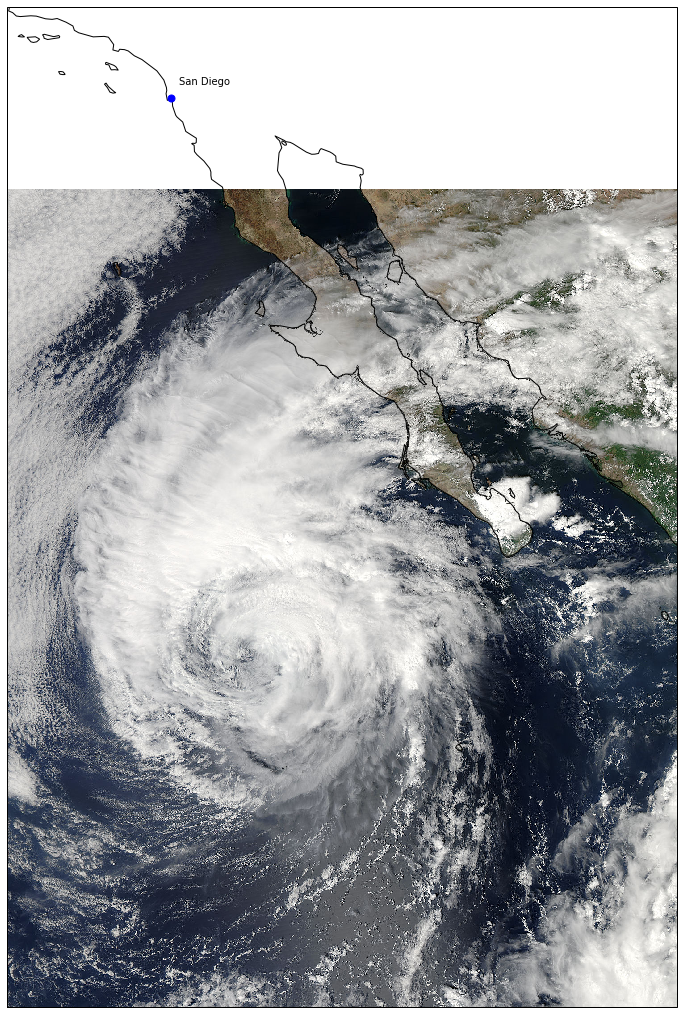

In [19]:
fig = plt.figure(figsize=(12, 20))

fname = './figures/Miriam.A2012270.2050.1km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# ajout de l'image
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# ajout d'une ville
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())